In [1]:
using Pkg
Pkg.activate("../")

  Activating project at `~/work`


In [1]:
#Pkg.instantiate()

In [3]:
# load functions
include("../src/eigen.jl");
include("../src/eigen_setup.jl");
include("../src/eigen_output.jl")

[ Info: Precompiling RCall [6f49c342-dc21-5d91-9882-a32aef131414]


output_validate (generic function with 1 method)

In [4]:
gr(fontfamily="Helvetica",foreground_color_legend = nothing,background_color_legend = nothing, titlefontsize=11, tickfontsize=10, legendfontsize=8,labelfontsize=10,grid=true, tick_direction=:out,size=(400,300))

Plots.GRBackend()

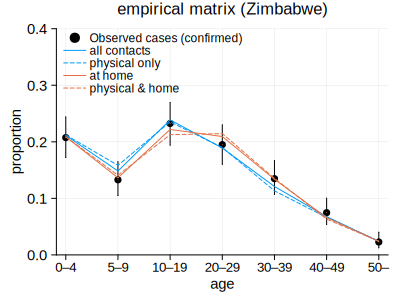

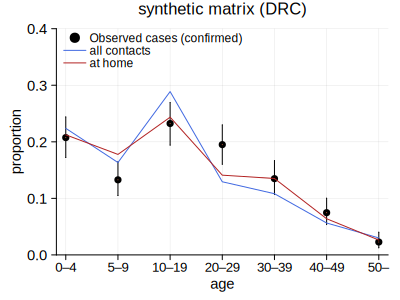

In [5]:
endemicplot = plot(plot(drc_endemic_ag),ylim=(0,0.35),xtickfontsize=9)

endemic2015_24_fit = output_fit(
    [tshuapa_h2hag,drc_endemic_ag];
    zmb_skeleton = [zmb2015,zmb2024],
    drc_skeleton = [drc2015,drc2024],
    dataplots = endemicplot
    );
zmb2015_24_fit = endemic2015_24_fit.zmb_fit
drc2015_24_fit = endemic2015_24_fit.drc_fit;

In [6]:
keys(zmb2015_24_fit)

(:all, :phys, :home, :physhome)

In [7]:
dominanteigval(zmb2015_24_fit.all[2]) # [2] is ContactMatrix for 2024 data 

10.634354444643712

In [8]:
zmb2015_24_fit.all[2].susceptibility

1-element Vector{Vector{Union{Float64, Array{Float64, 0}}}}:
 [fill(2.140710798352012), fill(1.0), fill(1.0), fill(1.0), fill(1.0), fill(0.6287660256973691), fill(0.257532051394738)]

In [9]:
zmb2015_24_fit.all[2].parameters

Dict{Symbol, Union{Float64, Array{Float64, 0}}} with 4 entries:
  :s_infant   => fill(2.14071)
  :s_vax      => fill(0.257532)
  :s_baseline => fill(1.0)
  :s_partvax  => fill(0.628766)

In [10]:
# add new parameters for the group just under partially vaccinated
for cm_vec in zmb2015_24_fit
    for cm in cm_vec
        cm.parameters[:s_postvax]=fill(0.5)
        cm.susceptibility[1][end-2]=cm.parameters[:s_postvax]
    end
end 

In [11]:
zmb2015_24_fit.all[2].parameters

Dict{Symbol, Union{Float64, Array{Float64, 0}}} with 5 entries:
  :s_infant   => fill(2.14071)
  :s_vax      => fill(0.257532)
  :s_postvax  => fill(0.5)
  :s_baseline => fill(1.0)
  :s_partvax  => fill(0.628766)

In [12]:
zmb2015_24_fit.all[2].susceptibility

1-element Vector{Vector{Union{Float64, Array{Float64, 0}}}}:
 [fill(2.140710798352012), fill(1.0), fill(1.0), fill(1.0), fill(0.5), fill(0.6287660256973691), fill(0.257532051394738)]

In [13]:
zmb2015_24_fit.all[2].parameters[:s_postvax].=1

0-dimensional Array{Float64, 0}:
1.0

In [14]:
zmb2015_24_fit.all[2].susceptibility

1-element Vector{Vector{Union{Float64, Array{Float64, 0}}}}:
 [fill(2.140710798352012), fill(1.0), fill(1.0), fill(1.0), fill(1.0), fill(0.6287660256973691), fill(0.257532051394738)]

In [15]:
zmb2015_24_fit.all[2].parameters

Dict{Symbol, Union{Float64, Array{Float64, 0}}} with 5 entries:
  :s_infant   => fill(2.14071)
  :s_vax      => fill(0.257532)
  :s_postvax  => fill(1.0)
  :s_baseline => fill(1.0)
  :s_partvax  => fill(0.628766)

In [16]:
zmb2015_24_fit.all[2].susceptibility[1]

7-element Vector{Union{Float64, Array{Float64, 0}}}:
 fill(2.140710798352012)
 fill(1.0)
 fill(1.0)
 fill(1.0)
 fill(1.0)
 fill(0.6287660256973691)
 fill(0.257532051394738)

### DRC

In [17]:
include("../src/Reff_projection_utils.jl");

In [18]:
years = [2010, 2015, 2020, 2024, 2030]
s_infant_values = [2.2, 1.9, 1.5, 1.3]
s_vax_values = [0.26, 0.28, 0.22, 0.23]

all_susceptibilities = Dict{Tuple{Float64, Float64}, Dict}()
# get the correct combination of susceptibility by age group
for (s_infant, s_vax) in zip(s_infant_values, s_vax_values)
    s_partvax = (1 + s_vax) / 2  
    susceptibilities = create_susceptibilities_for_years(years, s_infant, s_partvax, s_vax)
    all_susceptibilities[(s_infant, s_vax)] = susceptibilities
end

for (key, susceptibilities) in all_susceptibilities
    println("For s_infant = $(key[1]), s_vax = $(key[2]):")
    println(susceptibilities)
end

For s_infant = 1.5, s_vax = 0.22:
Dict{Int64, Vector}(2030 => [fill(1.5), fill(1.0), fill(1.0), fill(1.0), fill(1.0), fill(1.0), fill(0.22)], 2020 => [fill(1.5), fill(1.0), fill(1.0), fill(1.0), fill(1.0), fill(0.22), fill(0.22)], 2024 => [fill(1.5), fill(1.0), fill(1.0), fill(1.0), fill(1.0), fill(0.61), fill(0.22)], 2010 => [fill(1.5), fill(1.0), fill(1.0), fill(1.0), fill(0.22), fill(0.22), fill(0.22)], 2015 => [fill(1.5), fill(1.0), fill(1.0), fill(1.0), fill(0.61), fill(0.22), fill(0.22)])
For s_infant = 1.9, s_vax = 0.28:
Dict{Int64, Vector}(2030 => [fill(1.9), fill(1.0), fill(1.0), fill(1.0), fill(1.0), fill(1.0), fill(0.28)], 2020 => [fill(1.9), fill(1.0), fill(1.0), fill(1.0), fill(1.0), fill(0.28), fill(0.28)], 2024 => [fill(1.9), fill(1.0), fill(1.0), fill(1.0), fill(1.0), fill(0.64), fill(0.28)], 2010 => [fill(1.9), fill(1.0), fill(1.0), fill(1.0), fill(0.28), fill(0.28), fill(0.28)], 2015 => [fill(1.9), fill(1.0), fill(1.0), fill(1.0), fill(0.64), fill(0.28), fill(0.28)])


In [19]:
dominant_eigvals_all = []
dominant_eigvals_phys = []
dominant_eigvals_home = []
dominant_eigvals_physhome = []
include("../src/Reff_projection_setup.jl")

In [20]:
# all contact
println("Dominant Eigenvalues: ", dominant_eigvals_all)
println("Used combination: s_infant = $(first_key[1]), s_vax = $(first_key[2])")

Dominant Eigenvalues: Any[9.260633673263502, 9.62557295980762, 10.007588485731324, 10.679415971591101, 11.377118212024397]
Used combination: s_infant = 2.2, s_vax = 0.26


In [21]:
# physical contact
println("Dominant Eigenvalues: ", dominant_eigvals_phys)
println("Used combination: s_infant = $(second_key[1]), s_vax = $(second_key[2])")

Dominant Eigenvalues: Any[5.9585836377594985, 6.150132717318949, 6.352054879355397, 6.718843675957542, 7.11447550100882]
Used combination: s_infant = 1.9, s_vax = 0.28


In [22]:
# home contact
println("Dominant Eigenvalues: ", dominant_eigvals_home)
println("Used combination: s_infant = $(third_key[1]), s_vax = $(third_key[2])")

Dominant Eigenvalues: Any[4.313060885944405, 4.547424418286475, 4.790177926432802, 5.121758056752923, 5.4581711811573]
Used combination: s_infant = 1.5, s_vax = 0.22


In [23]:
# physical home contact
println("Dominant Eigenvalues: ", dominant_eigvals_physhome)
println("Used combination: s_infant = $(forth_key[1]), s_vax = $(forth_key[2])")

Dominant Eigenvalues: Any[2.9628586977230724, 3.115201610673074, 3.27690844344731, 3.468121876468929, 3.667818047363289]
Used combination: s_infant = 1.3, s_vax = 0.23


In [24]:
# R0 projection with community cotacts only
# model weights
w1 = 0.22
w2 = 0.38
w3 = 0.21
w4 = 0.17

# model averaging
weighted_avg = []
for i in 1:length(dominant_eigvals_all)
    weighted_value = w1 * dominant_eigvals_all[i] + w2 * dominant_eigvals_phys[i] + w3 * dominant_eigvals_home[i] + w4 * dominant_eigvals_physhome[i]
    push!(weighted_avg, weighted_value)
end
println("Weighted averages: ", weighted_avg)

Weighted averages: Any[5.7110299551278265, 5.9392198853934595, 6.178462120952873, 6.56778202153174, 6.9762117131235115]


In [25]:
β=0.82/weighted_avg[2]
R₀ = [x * β for x in weighted_avg]
println("R₀: ", R₀)
println("β: ", β)

R₀: [0.7884948955538756, 0.82, 0.853031043966092, 0.9067826013481978, 0.9631725571955836]
β: 0.13806527049396772


In [26]:
# Nouth and South Kivu (community+sexual contact)
s1 = 1 - 0.39
s2 = 1 - 0.4
s3 = 1 - 0.42
s4 = 1 - 0.42
weighted_avg_sexual_nskivu = model_averaging_sexual(s1, s2, s3, s4, dominant_eigvals_all, dominant_eigvals_phys, dominant_eigvals_home, dominant_eigvals_physhome)
println("Weighted averages (sexual): ", weighted_avg_sexual_nskivu)

Weighted averages (sexual): Any[5.754160563987271, 5.984694129576325, 6.226363900217201, 11.066114602596066, 11.754448355869357]


In [27]:
sR₀_kivu = [x * β for x in weighted_avg_sexual_nskivu]
println("sR₀: ", sR₀_kivu)
println("sβ: ", β)

sR₀: [0.7944497347326244, 0.826278413823616, 0.8596446160773638, 1.527846105924672, 1.6228810917604768]
sβ: 0.13806527049396772


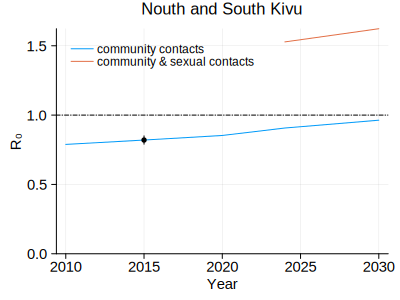

In [28]:
nskivu_plot=plot(years, R₀, xlabel="Year", ylabel="R₀", label="community contacts", ylim=(0,:auto), title="Nouth and South Kivu")
plot!([2024, 2030], [sR₀_kivu[4], sR₀_kivu[5]], label="community & sexual contacts")
plot!([2015, 2015], [0.79, 0.85], color=:black, label=nothing)
scatter!([2015], [0.82], color=:black, marker=:circle, markersize=3, markerstrokewidth=0, label=nothing)
hline!([1], color=:black, linestyle=:dashdot, label="")

### Burundi

In [29]:
years = [2010, 2015, 2020, 2024, 2030]
s_infant_values = [2.2, 1.9, 1.5, 1.3]
s_vax_values = 1　.- 0.7 .* (1 .- [0.26, 0.28, 0.22, 0.23])

all_susceptibilities = Dict{Tuple{Float64, Float64}, Dict}()
# get the correct combination of susceptibility by age group
for (s_infant, s_vax) in zip(s_infant_values, s_vax_values)
    s_partvax = (1 + s_vax)/2   
    susceptibilities = create_susceptibilities_for_years(years, s_infant, s_partvax, s_vax)
    all_susceptibilities[(s_infant, s_vax)] = susceptibilities
end

for (key, susceptibilities) in all_susceptibilities
    println("For s_infant = $(key[1]), s_vax = $(key[2]):")
    println(susceptibilities)
end

For s_infant = 1.5, s_vax = 0.45400000000000007:
Dict{Int64, Vector}(2030 => [fill(1.5), fill(1.0), fill(1.0), fill(1.0), fill(1.0), fill(1.0), fill(0.45400000000000007)], 2020 => [fill(1.5), fill(1.0), fill(1.0), fill(1.0), fill(1.0), fill(0.45400000000000007), fill(0.45400000000000007)], 2024 => [fill(1.5), fill(1.0), fill(1.0), fill(1.0), fill(1.0), fill(0.7270000000000001), fill(0.45400000000000007)], 2010 => [fill(1.5), fill(1.0), fill(1.0), fill(1.0), fill(0.45400000000000007), fill(0.45400000000000007), fill(0.45400000000000007)], 2015 => [fill(1.5), fill(1.0), fill(1.0), fill(1.0), fill(0.7270000000000001), fill(0.45400000000000007), fill(0.45400000000000007)])
For s_infant = 1.9, s_vax = 0.496:
Dict{Int64, Vector}(2030 => [fill(1.9), fill(1.0), fill(1.0), fill(1.0), fill(1.0), fill(1.0), fill(0.496)], 2020 => [fill(1.9), fill(1.0), fill(1.0), fill(1.0), fill(1.0), fill(0.496), fill(0.496)], 2024 => [fill(1.9), fill(1.0), fill(1.0), fill(1.0), fill(1.0), fill(0.748), fill(0.496

In [30]:
dominant_eigvals_all = []
dominant_eigvals_phys = []
dominant_eigvals_home = []
dominant_eigvals_physhome = []
include("../src/Reff_projection_setup.jl")

In [31]:
println("Dominant Eigenvalues: ", dominant_eigvals_all)
println("Used combination: s_infant = $(first_key[1]), s_vax = $(first_key[2])")

Dominant Eigenvalues: Any[10.090490585609786, 10.373325030354428, 10.663280775230339, 11.149049856684275, 11.645852650291452]
Used combination: s_infant = 2.2, s_vax = 0.482


In [32]:
println("Dominant Eigenvalues: ", dominant_eigvals_phys)
println("Used combination: s_infant = $(second_key[1]), s_vax = $(second_key[2])")

Dominant Eigenvalues: Any[6.40537437513781, 6.55451367121499, 6.7082547893471745, 6.979460215881341, 7.263780995123767]
Used combination: s_infant = 1.9, s_vax = 0.496


In [33]:
println("Dominant Eigenvalues: ", dominant_eigvals_home)
println("Used combination: s_infant = $(third_key[1]), s_vax = $(third_key[2])")

Dominant Eigenvalues: Any[4.828027462331271, 4.997980633376489, 5.171462612239584, 5.403809772287082, 5.638393007418156]
Used combination: s_infant = 1.5, s_vax = 0.45400000000000007


In [34]:
println("Dominant Eigenvalues: ", dominant_eigvals_physhome)
println("Used combination: s_infant = $(forth_key[1]), s_vax = $(forth_key[2])")

Dominant Eigenvalues: Any[3.2660452698524147, 3.3779592944456556, 3.493996495911079, 3.6311252306022075, 3.77211453697737]
Used combination: s_infant = 1.3, s_vax = 0.4610000000000001


In [35]:
# R0 projection with community cotacts only
# model weights
w1 = 0.22
w2 = 0.38
w3 = 0.21
w4 = 0.17

# model averaging
weighted_avg = []
for i in 1:length(dominant_eigvals_all)
    weighted_value = w1 * dominant_eigvals_all[i] + w2 * dominant_eigvals_phys[i] + w3 * dominant_eigvals_home[i] + w4 * dominant_eigvals_physhome[i]
    push!(weighted_avg, weighted_value)
end
println("Weighted averages: ", weighted_avg)

Weighted averages: Any[6.223063654350998, 6.396675714804495, 6.575045143377797, 6.857077191888113, 7.1476463640551176]


In [36]:
R₀_burundi = [x * β for x in weighted_avg]
println("R₀ (Burundi): ", R₀_burundi)
println("β : ", β)

R₀ (Burundi): [0.8591889667391498, 0.8831587628266768, 0.9077853862305043, 0.9467242172960488, 0.9868417286484946]
β : 0.13806527049396772


In [37]:
# Burundi (community+sexual contact)
s1 = 1 - 0.05
s2 = 1 - 0.06
s3 = 1 - 0.05
s4 = 1 - 0.04

weighted_avg_sexual_burundi = model_averaging_sexual(s1, s2, s3, s4, dominant_eigvals_all, dominant_eigvals_phys, dominant_eigvals_home, dominant_eigvals_physhome)

println("Weighted averages (sexual_burundi): ", weighted_avg_sexual_burundi)

Weighted averages (sexual_burundi): Any[6.271343928974311, 6.4466555211382595, 6.626759769500193, 7.297789485458641, 7.607068135804404]


In [38]:
sR₀_burundi = [x * β for x in weighted_avg_sexual_burundi]
println("sR₀: ", sR₀_burundi)

sR₀: [0.8658547959145405, 0.8900592383073842, 0.9149253800745873, 1.0075712793178808, 1.0502719198358779]


### Plot

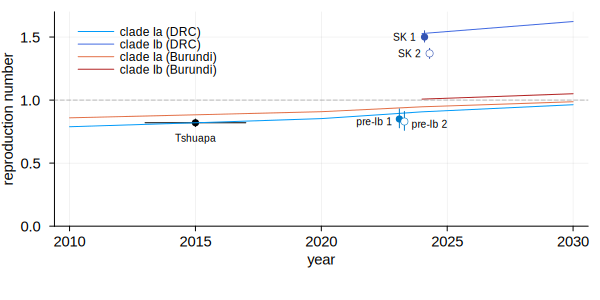

In [59]:
using Colors
default_color = palette(:auto)[1]
colours = [:royalblue, 1, 2, :firebrick, RGBA(red(default_color) * 0.8, green(default_color) * 0.8, blue(default_color) * 0.8, 1.0), RGBA(65/255 * 0.8, 105/255 * 0.8, 225/255 * 0.8, 1.0)]  
bottom_margin = 10 * Plots.PlotMeasures.mm

plot([2015, 2015], [0.79, 0.85], color=:black, xlabel="year", ylabel="reproduction number", label="", ylim=(0,1.7), title="", size=(600,300), bottom_margin=bottom_margin)
scatter!([2015], [0.82], color=:black, marker=:black, markersize=4, markerstrokewidth=0, label=nothing)
plot!([2013, 2017], [0.82, 0.82], color=:black, label=nothing)
annotate!(2015, 0.7, text("Tshuapa", "Helvetica", :black, 7))

plot!(years, R₀, color=colours[2], label="clade Ia (DRC)")
plot!([2024, 2030], [sR₀_kivu[4], sR₀_kivu[5]], label="clade Ib (DRC)", color=colours[1])
plot!(years, R₀_burundi, label="clade Ia (Burundi)", color=colours[3])
plot!([2024, 2030], [sR₀_burundi[4], sR₀_burundi[5]], label="clade Ib (Burundi)", color=colours[4])

plot!([2023.1, 2023.1], [0.78, 0.93], color=colours[5], label=nothing)
scatter!([2023.1], [0.85], marker=:circle, color=colours[5], markersize=4, markerstrokewidth=0, label=nothing)
plot!([2023.3, 2023.3], [0.76, 0.91], color=colours[5], label=nothing)
scatter!([2023.3], [0.83], marker=:circle, markercolor=:white, markerstrokecolor= colours[5], markersize=4, markerstrokewidth=1, label=nothing)
annotate!(2022.1, 0.83, text("pre-Ib 1", "Helvetica", :black, 7), fontfamily="Helvetica")
annotate!(2024.3, 0.81, text("pre-Ib 2", "Helvetica", :black, 7), fontfamily="Helvetica")

plot!([2024.1, 2024.1], [1.46, 1.55], color=colours[6], label=nothing)
scatter!([2024.1], [1.50], color=colours[6], marker=:circle, markersize=4, markerstrokewidth=0, label=nothing)
plot!([2024.3, 2024.3], [1.33, 1.41], color=colours[6], label=nothing)
scatter!([2024.3], [1.37], marker=:circle, markersize=4, markercolor=:white, markerstrokewidth=1, markerstrokecolor=colours[6], label=nothing)
annotate!(2023.3, 1.50, text("SK 1", "Helvetica", :black, 7))
annotate!(2023.5, 1.37, text("SK 2", "Helvetica",:black, 7))

hline!([1], color=RGBA(0.5, 0.5, 0.5, 0.5), linestyle=:dash, label="")